# Lab \#14: K-means Clustering 
---

###**Description**: 
In this lab, you will implement a k-means model on several datasets.  

###**Goals**: 
By the end of this lab, you will:
* Create a k-means model on your own
* Use a k-means model to add new data to your clusters

### **Cheat sheet:**
[K-Means Cheat sheet](https://docs.google.com/document/d/1qjofYW__LJs2-ajXYipA6oiF00ky4ebXdCYQAFyPtSg/edit?usp=sharing) 

**Run the code below before continuing:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection

## Part 1: Practice Together
---

In this section, we will be clustering housing data from California. This dataset from [sklearn](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) was obtained from the [StatLib](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) repository. It contains data on 20,640 houses that includes the following information on each house:
* `MedInc`: median income in block group
* `HouseAge`: median house age in block group
* `AveRooms`: average number of rooms per household
* `AveBedrms`: average number of bedrooms per household
* `Population`: block group population
* `AveOccup`: average number of household members
* `Latitude`: block group latitude
* `Longitude`: block group longitude

These attributes are used to predict median house value for California districts in thousands of dollars. We will look for patterns and attempt to cluster variables using these attributes.

#### **Step #1: Load the California Dataset from sklearn**


In [ ]:
california = datasets.fetch_california_housing()
cali_df = pd.DataFrame(data=california.data, columns=california.feature_names)
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


#### **Before we continue, we are going to visualize the data before we separate into our clusters. Run the following code to see the locations of the houses we will be clustering.**


(32.05, 42.445, -124.8975, -113.4)

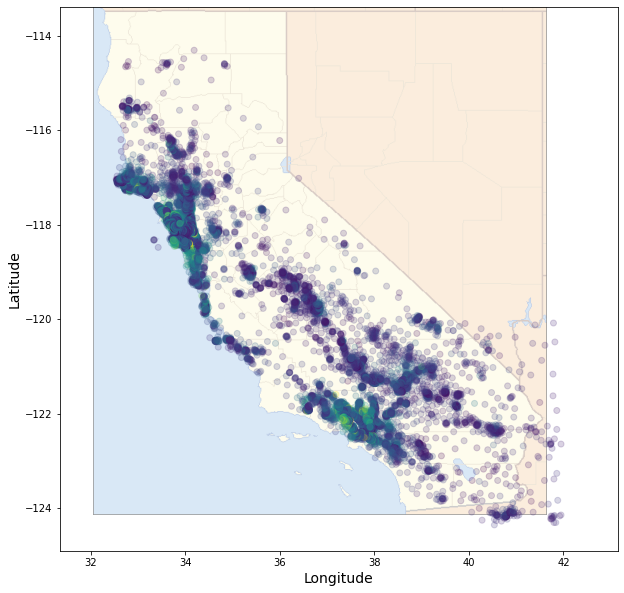

In [ ]:
plt.figure(figsize=(10,10))

# This puts an image of california underneath
cali_image_url = 'https://upload.wikimedia.org/wikipedia/commons/1/1b/California_Locator_Map.PNG'
cali = plt.imread(cali_image_url)
plt.imshow(cali, extent=[32.05, 41.65,-124.15, -113.40],origin='upper', alpha = 0.4)


plt.scatter(cali_df["Latitude"], cali_df["Longitude"], c=cali_df["MedInc"], alpha=0.2)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.axis('equal')

#### **Step #2: Create X**
Use the following to create our X:
```
X = cali_df.values
```


In [ ]:
X = cali_df.values


#### **Step #3: Split data**
*We do not do this step for k-means!*



#### **Step #4: Import your model**


In [ ]:
# import the K-Means algorithm
from sklearn.cluster import KMeans

#### **Step #5: Initialize your model and set hyperparameters**

Set `n_clusters = 3` as your hyperparameter.

In [ ]:
kmeans = KMeans(n_clusters = 2)

#### **Step #6: Fit your model and create a visual**

This dataset requires standardization. Be sure to standardize your data in this step.

Use the following to standardize:
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

Then pass in your scaled values to fit.

```python
y_pred = kmeans.fit_predict(X_scaled)
```

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_pred = kmeans.fit_predict(X_scaled)

**Create a visual**

In K-means, most of the value comes in looking for the **centroids,** which refers to the computed mean value in each cluster. It can help us to understand what the the model recognized as each cluster. 

**Run the given code to visualize the clusters.**

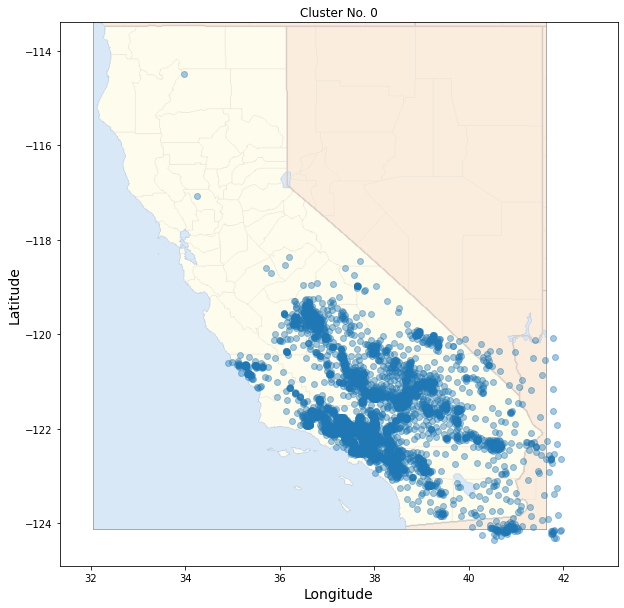

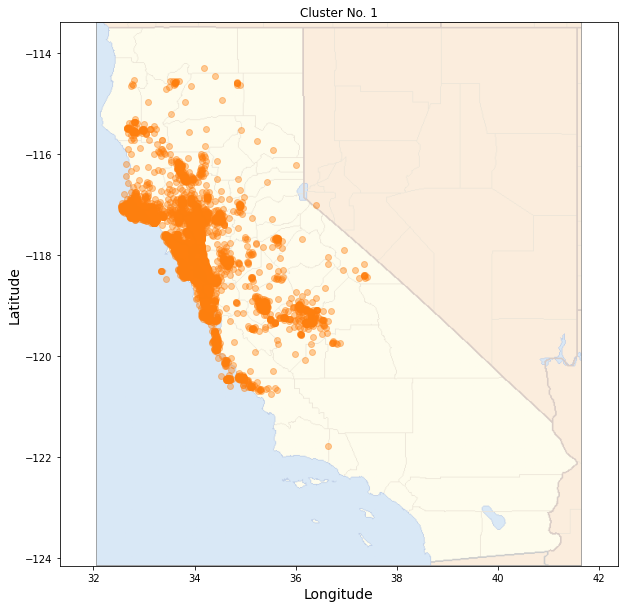

In [ ]:
# This has been done for you!


# Iterate through the clusters
for y in range(2):
  # This puts an image of california underneath
  plt.figure(figsize=(10,10))
  cali_image_url = 'https://upload.wikimedia.org/wikipedia/commons/1/1b/California_Locator_Map.PNG'
  cali = plt.imread(cali_image_url)
  plt.imshow(cali, extent=[32.05, 41.65,-124.15, -113.40],origin='upper', alpha = 0.4)
  plt.axis('equal')
  plt.title(f"Cluster No. {y}")
  plt.ylabel("Latitude", fontsize=14)
  plt.xlabel("Longitude", fontsize=14)
  plt.scatter(X[y_pred == y, 6], X[y_pred == y, 7], label=y, color=f'C{y}', alpha=0.4)
  plt.show()

 #### **Step #7: Calculate the Silhouette score to test the accuracy of your model**
A silhoutte score is a number between -1 and 1 with 1 representing a perfect cluster and -1 representing poor clusters.

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('silhouette score: ', score)

silhouette score:  -0.003728242145811622


#### **Step #8: Use the model**

Draw a scatterplot and use it to determine which cluster the following houses would belong to. Make these new datapoints appear as a star shape on the graph.

1. **House #1:** `MedInc = 4`	`HouseAge = 50`	`AveRooms = 6`	`AveBedrms = 1`	`Population = 1700`	`AveOccup = 3`	`Latitude = 37.8`	`Longitude = -122.2`
2. **House #2:** `MedInc = 3`	`HouseAge = 30`	`AveRooms = 5`	`AveBedrms = 2`	`Population = 1400`	`AveOccup = 3`	`Latitude = 36.1`	`Longitude = -120.3`

The code had been provided below. Create `new_houses` and then run the cell to view your predictions.
```
new_houses = np.array([[4, 50, 6, 1, 1700, 3, 37.8, -122.2], 
                      [3, 30, 5, 2, 1400, 3, 36.1, -120.3]])
```

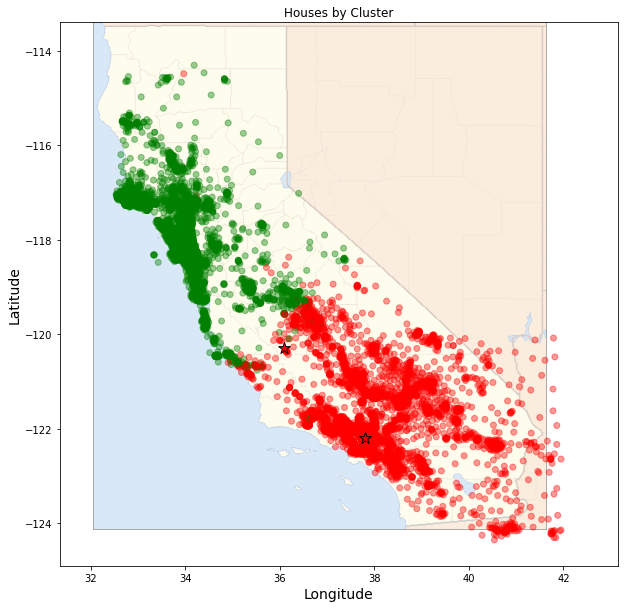

In [ ]:
new_houses = np.array([[4, 50, 6, 1, 1700, 3, 37.8, -122.2], 
                      [3, 30, 5, 2, 1400, 3, 36.1, -120.3]])

# coloring each cluster
labels = kmeans.predict(scaler.transform(new_houses))
lbls = kmeans.labels_
colormap = np.array(['red','green','blue'])

# scatter plot on map
plt.figure(figsize=(10,10))
cali_image_url = 'https://upload.wikimedia.org/wikipedia/commons/1/1b/California_Locator_Map.PNG'
cali = plt.imread(cali_image_url)
plt.imshow(cali, extent=[32.05, 41.65,-124.15, -113.40],origin='upper', alpha = 0.4)
plt.axis('equal')
plt.title("Houses by Cluster")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# plot all of our clusters
plt.scatter(cali_df["Latitude"], cali_df["Longitude"], color=colormap[lbls], alpha=0.4)

# add the new houses
plt.scatter(new_houses[0][6], new_houses[0][7], color=colormap[labels][0], marker="*", s=150, edgecolor="black")
plt.scatter(new_houses[1][6], new_houses[1][7], color=colormap[labels][1], marker="*", s=150, edgecolor="black")

# show
plt.show()

## Part 2: Independent Practice
---
This is the MNIST Handwritten dataset, which contains 70,000 handwritten digits. Our goal is to **cluster** the handwriting together *such that the clusters recognize the same character*. 


<br> 
**NOTE: *Some of these steps will take a long time to load. Nothing is wrong with your code if this happens to you.***

#### **Step #1: Load the MNIST dataset from sklearn**
*Loading the data may take a while*.



In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

mnist_df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Before we continue, we are going to visualize the data before we separate into our clusters. Run the following code to look at the images we will be clustering.**

The MNIST dataset contains a value from 0 to 255 representing each pixel on an 28x28 grid and the `target` showing the true value of the digit from `0` up to `9`.

We would like our K-Means classifier to group together similar digits.

In [ ]:
# We wrote this function for you - it takes an array of shape (784,1) and
# draws an image
def display_image(image_data):
  reshaped = image_data.reshape(28, 28)
  plt.imshow(reshaped, cmap="gray")
  plt.show()

Display image number 28 from the dataset


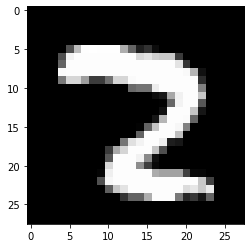

Display image number 13 from the dataset


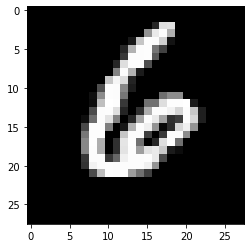

Display image number 18 from the dataset


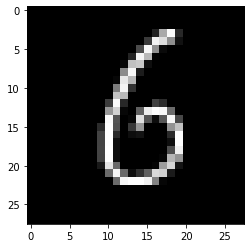

Display image number 89 from the dataset


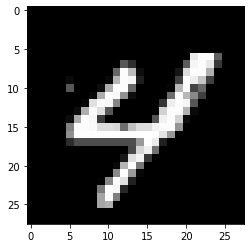

Display image number 69 from the dataset


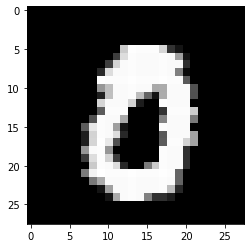

In [ ]:
# Looking at 5 random images:

# This generates 5 random numbers between 0 and 100
random_images = np.random.randint(0,100,5)

# draw the image of the random selection
for random_image in random_images:
  print(f"Display image number {random_image} from the dataset")
  display_image(mnist_df.values[random_image])

#### **Step #2: Create X**
Use all 784 columns of pixel data as our independent variables.

```
X = mnist_df.values
```


In [ ]:
X = mnist_df.values

####**A test/train split is not necessary for unsupervised learning, so we will skip step #3.**

#### **Step #4: Import your model**



In [ ]:
# import the K-Means algorithm
from sklearn.cluster import KMeans

#### **Step #5: Initialize your model**
Set `n_clusters = 10`.

In [ ]:
kmeans = KMeans(n_clusters = 10)

#### **Step #6: Fit your model and create a visual**
*This step may take a while.*


In [ ]:


y_pred = kmeans.fit_predict(X_scaled)

**Create a visual**

In K-means, most of the value comes in looking for the **centroids,** which refers to the computed mean value in each cluster. It can help us to understand what the the model recognized as each cluster. Look at what we have drawn below, do you notice anything strange?

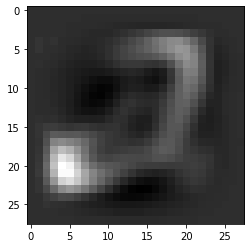

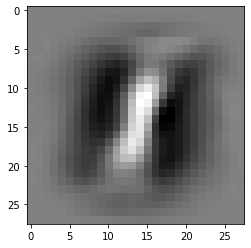

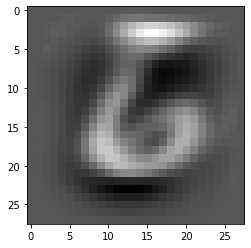

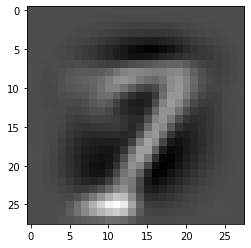

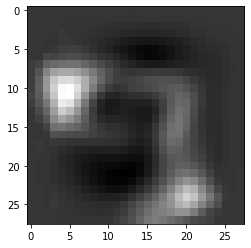

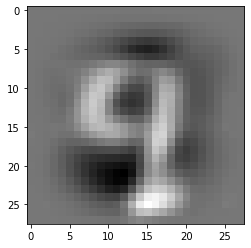

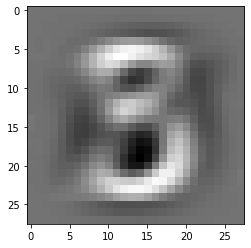

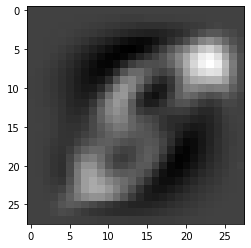

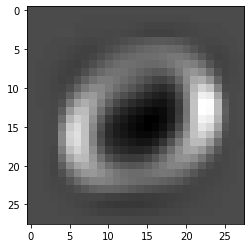

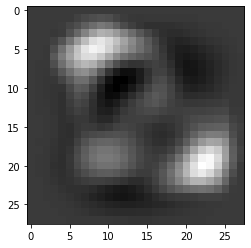

In [ ]:
# Let's look at the cluster centroids:
for centroid in kmeans.cluster_centers_:
  display_image(centroid)

#### **Step #7: Calculate the Silhouette score to test the accuracy of your model**

**Reminder:** A silhoutte score is a number between -1 and 1 with 1 representing a perfect cluster and -1 representing poor clusters.

*This step may take a while.*

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('silhouette score: ', score)

silhouette score:  0.06031785207053382


#### **Step #8: Use the model**
Lets see how the classifier works! Run the provided code to see how the model clusters different handwritten numbers.

**Play around with this step and see what your model does with different images.**


In [ ]:
# This code is already complete, run it to test out the model
image_number = int(input(f"Enter a number to select an image out of the {len(X)} images dataset\n"))
print(f"This is the image you have selected")
display_image(X[image_number])
model_guess = kmeans.predict([X[image_number]])[0]
print(f"The KNN Classifier puts this image in class: {model_guess}")
print(f"Class {model_guess} has centroid:")
display_image(kmeans.cluster_centers_[model_guess])

#### **Step #9: Optional Tuning**
We gave you the value of `k = 10`, but what if there actually was a better value for k? Try a different value for k in steps #5-7 and see if it improves your model or not.


---
© 2023 The Coding School, All rights reserved